# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [ ]:
dataframe = pd.read_csv(r"/content/BDSeleccionadaV3.csv")
dataframe.head()

,Edad,Sexo,IMC,CintCad,GrasCorp,Cigarrillos,Alcohol,Piel,Diabetes,MasaMusc,ActFisica,Trabajo,Farmacos,ProtectorSolar,ExposicionDias,ExposicionMinutos,VitaminaD
0,37,1,23.4,0.87,20.0,5,1,4,0,23.8,0,1,7,1,2,60,20.70
1,39,1,25.9,0.91,22.0,7,1,3,0,21.8,0,1,4,2,2,30,26.74
2,60,2,30.6,0.95,25.8,7,1,3,0,34.2,1,1,7,5,0,0,20.53
3,53,2,28.4,0.93,25.0,7,1,4,0,28.7,0,2,8,1,5,150,11.35
4,39,2,25.2,0.89,18.8,7,1,3,0,26.8,1,1,8,2,1,10,34.61


In [ ]:
dataframe.describe()

,Edad,Sexo,IMC,CintCad,GrasCorp,Cigarrillos,Alcohol,Piel,Diabetes,MasaMusc,ActFisica,Trabajo,Farmacos,ProtectorSolar,ExposicionDias,ExposicionMinutos,VitaminaD
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,52.101490,0.887337,28.874888,0.957458,26.653492,6.824022,0.387337,4.189944,0.265363,38.802700,0.631285,1.606145,4.665736,2.850093,4.286778,935.679702,26.048371
std,14.535362,0.671180,8.783117,0.104656,10.818743,0.787685,0.487369,1.141952,0.441732,18.102313,0.528753,0.791615,2.472401,1.535800,2.988900,965.905969,12.236051
min,11.000000,0.000000,18.080000,0.010000,7.000000,1.000000,0.000000,1.000000,0.000000,13.600000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.160000
25%,40.000000,0.000000,25.485000,0.890000,18.412500,7.000000,0.000000,3.000000,0.000000,25.600000,0.000000,1.000000,2.000000,1.000000,2.000000,60.000000,17.000000
50%,51.000000,1.000000,27.900000,0.940000,24.800000,7.000000,0.000000,4.000000,0.000000,39.750000,1.000000,1.000000,4.000000,3.000000,4.000000,550.500000,23.000000
75%,63.000000,1.000000,31.050000,1.000000,34.105000,7.000000,1.000000,5.000000,1.000000,48.507500,1.000000,2.000000,7.000000,4.000000,7.000000,1765.750000,33.000000
max,90.000000,2.000000,260.410000,1.420000,50.400000,7.000000,1.000000,6.000000,1.000000,419.250000,2.000000,3.000000,8.000000,5.000000,10.000000,3000.000000,70.000000


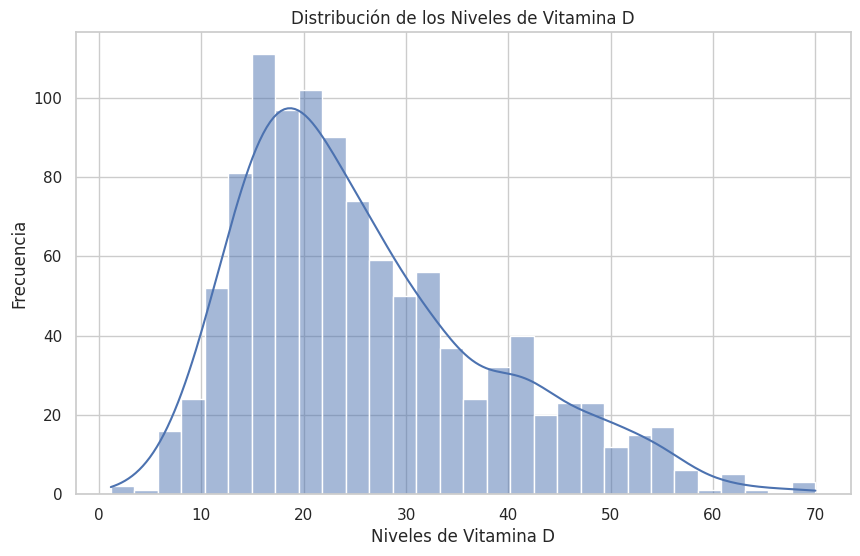

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando el estilo de los gráficos
sns.set(style="whitegrid")

# Creando la figura y el eje para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de distribución de los niveles de Vitamina D
sns.histplot(dataframe['VitaminaD'], bins=30, kde=True, ax=ax)

ax.set_title('Distribución de los Niveles de Vitamina D')
ax.set_xlabel('Niveles de Vitamina D')
ax.set_ylabel('Frecuencia')

plt.show()

   Edad  Sexo   IMC  CintCad  GrasCorp  Cigarrillos  Alcohol  Piel  Diabetes  \
0    37     1  23.4     0.87      20.0            5        1     4         0   
1    39     1  25.9     0.91      22.0            7        1     3         0   
2    60     2  30.6     0.95      25.8            7        1     3         0   
3    53     2  28.4     0.93      25.0            7        1     4         0   
4    39     2  25.2     0.89      18.8            7        1     3         0   

   MasaMusc  ActFisica  Trabajo  Farmacos  ProtectorSolar  ExposicionDias  \
0      23.8          0        1         7               1               2   
1      21.8          0        1         4               2               2   
2      34.2          1        1         7               5               0   
3      28.7          0        2         8               1               5   
4      26.8          1        1         8               2               1   

   ExposicionMinutos  VitaminaD  CategoriaVitaD  
0     

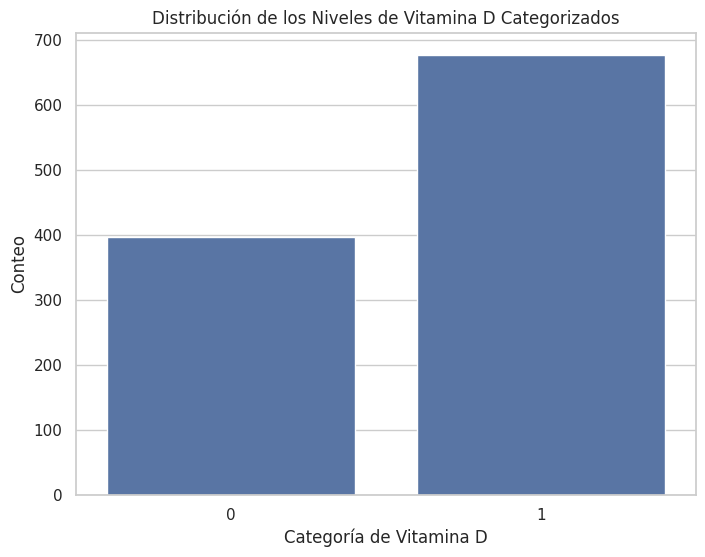

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def categorizar_vitamina_d_binario(valor):
    if valor < 20:
        return 0
    #elif valor < 20:
    #    return 1
    else:
        return 1

dataframe['CategoriaVitaD'] = dataframe['VitaminaD'].apply(categorizar_vitamina_d_binario)
dataframe['CategoriaVitaD'] = dataframe['CategoriaVitaD'].astype(int)
print(dataframe.head())

# Generamos la gráfica para visualizar la distribución de los datos en 'CategoriaVitaD'
plt.figure(figsize=(8, 6))
sns.countplot(x='CategoriaVitaD', data=dataframe)
plt.title('Distribución de los Niveles de Vitamina D Categorizados')
plt.xlabel('Categoría de Vitamina D')
plt.ylabel('Conteo')
plt.show()

In [ ]:
print(dataframe.groupby('CategoriaVitaD').size())

CategoriaVitaD
0    397
1    677
dtype: int64


## Visualizamos los datos

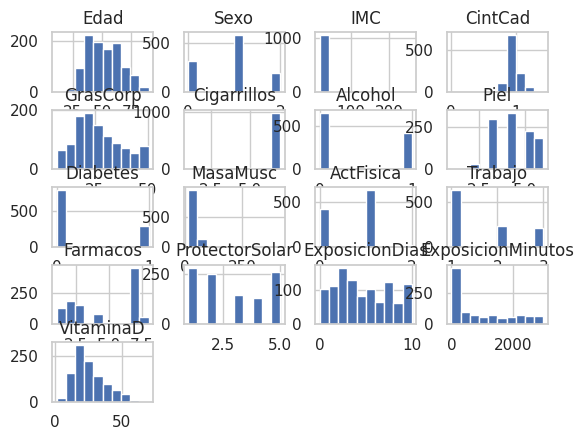

In [ ]:
dataframe.drop(['CategoriaVitaD'], axis=1).hist()
plt.show()

In [ ]:
#sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

## Creamos el modelo

In [ ]:
X = np.array(dataframe.drop(['CategoriaVitaD', 'VitaminaD'], axis=1))  # asegúrate de especificar axis=1
y = np.array(dataframe['CategoriaVitaD'])

X.shape

(1074, 16)

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict(X)
print(predictions)

[0 0 1 ... 1 1 1]


In [ ]:
model.score(X,y)

0.7067039106145251

# Adicional: Validación del Modelo

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
predictions = model.predict(X_validation)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.697368 (0.034136)


## Reporte de Resultados

In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[ 40  43]
 [ 30 102]]


In [ ]:
accuracy = accuracy_score(y_true=Y_validation, y_pred=predictions, normalize=True)
print(f"El accuracy de test es: {100 * accuracy} % \n")
print(classification_report(Y_validation, predictions))

El accuracy de test es: 66.04651162790698 % 

              precision    recall  f1-score   support

           0       0.57      0.48      0.52        83
           1       0.70      0.77      0.74       132

    accuracy                           0.66       215
   macro avg       0.64      0.63      0.63       215
weighted avg       0.65      0.66      0.65       215



In [ ]:
!pip install joblib


In [ ]:
import joblib


# Exportando modelo a un archivo
joblib.dump(model, '/content/RL_model.joblib')

['/content/RL_model.joblib']